**Artificial Neural Network using Keras Demostrations**
                                                       
 This Kernal demostrate how we can use Keras to implement ANN.
 **Problem Statement:** Predicting admission from important parameters. The end result is a model using with a student can predict the changes of his admission in the university

In [7]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
#import seaborn as sns

# importing data
data = pd.read_csv('C://Users//Shriya Garg//Chaotic_dataset.csv' , names=['a', 'b','c','d','e'])
data.head()

,a,b,c,d,e
0,0.1000,0.1000,-0.0577,-0.1550,-0.0272
1,0.1000,-0.0577,-0.1550,-0.0272,0.1690
2,-0.0577,-0.1550,-0.0272,0.1690,0.1360
3,-0.1550,-0.0272,0.1690,0.1360,-0.1170
4,-0.0272,0.1690,0.1360,-0.1170,-0.2330


Lets check the data by viewing a few records

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation

Feature scaling

In [9]:
data=data[0:4990].abs()
print(len(data))
n = len(data) - 10
#pd.DataFrame(np.random.rand(10, 3))
for chunk in np.array_split(data, len(data)-n):
    assert len(chunk) == len(data) / 10
    X=chunk[['a','b','c','d']]
    y = np.array(chunk["e"])
print(chunk)
X

4990
           a       b       c       d       e
4491  0.9040  0.1030  1.0100  0.6890  0.4510
4492  0.1030  1.0100  0.6890  0.4510  0.9880
4493  1.0100  0.6890  0.4510  0.9880  0.3200
4494  0.6890  0.4510  0.9880  0.3200  0.9040
4495  0.4510  0.9880  0.3200  0.9040  0.7760
4496  0.9880  0.3200  0.9040  0.7760  0.2430
4497  0.3200  0.9040  0.7760  0.2430  1.0400
4498  0.9040  0.7760  0.2430  1.0400  0.4960
4499  0.7760  0.2430  1.0400  0.4960  0.7410
4500  0.2430  1.0400  0.4960  0.7410  0.8580
4501  1.0400  0.4960  0.7410  0.8580  0.0170
4502  0.4960  0.7410  0.8580  0.0170  1.0400
4503  0.7410  0.8580  0.0170  1.0400  0.6330
4504  0.8580  0.0170  1.0400  0.6330  0.5530
4505  0.0170  1.0400  0.6330  0.5530  0.9470
4506  1.0400  0.6330  0.5530  0.9470  0.2120
4507  0.6330  0.5530  0.9470  0.2120  0.9690
4508  0.5530  0.9470  0.2120  0.9690  0.7340
4509  0.9470  0.2120  0.9690  0.7340  0.3530
4510  0.2120  0.9690  0.7340  0.3530  1.0200
4511  0.9690  0.7340  0.3530  1.0200  0.4110
4512 

,a,b,c,d
4491,0.9040,0.1030,1.0100,0.6890
4492,0.1030,1.0100,0.6890,0.4510
4493,1.0100,0.6890,0.4510,0.9880
4494,0.6890,0.4510,0.9880,0.3200
4495,0.4510,0.9880,0.3200,0.9040
4496,0.9880,0.3200,0.9040,0.7760
4497,0.3200,0.9040,0.7760,0.2430
4498,0.9040,0.7760,0.2430,1.0400
4499,0.7760,0.2430,1.0400,0.4960
4500,0.2430,1.0400,0.4960,0.7410


In [47]:
ms_trains = []
ms_tests = []
for i in range(3,400):#len(data)):
    chunk = data[0:i]
    X=chunk[['a','b','c','d']]
    # labels y are one-hot encoded, so it appears as two classes 
    y = np.array(chunk["e"])
   # print(chunk)
    #X_train, 
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)#andom_state=100)

 #   X_train

#    y_test


    model = Sequential()
    model.add(Dense(128, input_dim=4))
    model.add(Activation('sigmoid'))
    model.add(Dense(32))
    model.add(Activation('sigmoid'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='mean_squared_error',
                  optimizer='sgd',
                  metrics=['accuracy'])
   # print(model.summary())

    #Training the model

    model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

    y_pred_test_ann = model.predict(X_test)
    y_train_pred_ann = model.predict(X_train)
    mse = (mean_squared_error(y_train,y_train_pred_ann))
    print("Train : {:0.8f}".format(mse))
    ms_trains.append(mse)

    mse1 = mean_squared_error(y_test,y_pred_test_ann)
    print("Test : {:0.8f}".format(mse1))
    ms_tests.append(mse1)
    model.save('Uber_ANN')

  #  Evaluating the model

    score = model.evaluate(X_test, y_test)
    print('chunk', i , '=',score)

Train : 0.00303818
Test : 0.00621063
1/1 [==============================] - 1s 1s/step
chunk 3 = [0.006210627034306526, 0.0]
Train : 0.00217199
Test : 0.00492128
2/2 [==============================] - 1s 701ms/step
chunk 4 = [0.004921285435557365, 0.0]
Train : 0.00343974
Test : 0.00819043
2/2 [==============================] - 2s 766ms/step
chunk 5 = [0.008190431632101536, 0.0]
Train : 0.00194617
Test : 0.02146493
2/2 [==============================] - 1s 722ms/step
chunk 6 = [0.021464932709932327, 0.0]
Train : 0.00435163
Test : 0.01942094
3/3 [==============================] - 2s 535ms/step
chunk 7 = [0.019420944154262543, 0.0]
Train : 0.00299096
Test : 0.02206690
3/3 [==============================] - 2s 543ms/step
chunk 8 = [0.022066904231905937, 0.0]
Train : 0.00733901
Test : 0.00681745
3/3 [==============================] - 1s 478ms/step
chunk 9 = [0.0068174488842487335, 0.0]
Train : 0.01288106
Test : 0.00181488
3/3 [==============================] - 2s 564ms/step
chunk 10 = [0.00

chunk 66 = [0.09655113518238068, 0.0]
Train : 0.10250068
Test : 0.10250721
21/21 [==============================] - 2s 76ms/step
chunk 67 = [0.10250720381736755, 0.0]
Train : 0.10695007
Test : 0.09626231
21/21 [==============================] - 2s 88ms/step
chunk 68 = [0.09626230597496033, 0.0]
Train : 0.09730220
Test : 0.11535899
21/21 [==============================] - 2s 71ms/step
chunk 69 = [0.11535898596048355, 0.0]
Train : 0.09789634
Test : 0.10841300
21/21 [==============================] - 2s 72ms/step
chunk 70 = [0.10841300338506699, 0.0]
Train : 0.10273086
Test : 0.10600284
22/22 [==============================] - 2s 71ms/step
chunk 71 = [0.10600283741950989, 0.0]
Train : 0.10789203
Test : 0.09092399
22/22 [==============================] - 2s 69ms/step
chunk 72 = [0.0909239798784256, 0.0]
Train : 0.09984731
Test : 0.10777131
22/22 [==============================] - 2s 70ms/step
chunk 73 = [0.10777130722999573, 0.0]
Train : 0.09612881
Test : 0.11221753
23/23 [================

39/39 [==============================] - 2s 50ms/step
chunk 128 = [0.11756181736022998, 0.0]
Train : 0.10213453
Test : 0.11859478
39/39 [==============================] - 2s 50ms/step
chunk 129 = [0.11859477521517338, 0.0]
Train : 0.09945588
Test : 0.12307921
39/39 [==============================] - 2s 51ms/step
chunk 130 = [0.12307921090187171, 0.0]
Train : 0.11056053
Test : 0.09195566
40/40 [==============================] - 2s 50ms/step
chunk 131 = [0.09195565804839134, 0.0]
Train : 0.10170881
Test : 0.10794328
40/40 [==============================] - 2s 50ms/step
chunk 132 = [0.10794328153133392, 0.025]
Train : 0.10797754
Test : 0.09428570
40/40 [==============================] - 2s 51ms/step
chunk 133 = [0.09428569674491882, 0.0]
Train : 0.10233445
Test : 0.10400651
41/41 [==============================] - 2s 50ms/step
chunk 134 = [0.10400650850156458, 0.0]
Train : 0.11149155
Test : 0.08740243
41/41 [==============================] - 2s 50ms/step
chunk 135 = [0.08740243243008125, 

Train : 0.10695624
Test : 0.08975516
57/57 [==============================] - 4s 75ms/step
chunk 190 = [0.08975515932890407, 0.0]
Train : 0.09938116
Test : 0.10722468
58/58 [==============================] - 4s 74ms/step
chunk 191 = [0.10722467149126119, 0.0]
Train : 0.10200959
Test : 0.10489421
58/58 [==============================] - 4s 74ms/step
chunk 192 = [0.10489420361559966, 0.0]
Train : 0.09756741
Test : 0.11084587
58/58 [==============================] - 4s 75ms/step
chunk 193 = [0.11084586741595433, 0.0]
Train : 0.10316328
Test : 0.09622029
59/59 [==============================] - 4s 74ms/step
chunk 194 = [0.09622028646832806, 0.0]
Train : 0.09836486
Test : 0.10711976
59/59 [==============================] - 4s 75ms/step
chunk 195 = [0.10711976090225123, 0.01694915266865391]
Train : 0.10211226
Test : 0.10072716
59/59 [==============================] - 4s 76ms/step
chunk 196 = [0.1007271549206669, 0.0]
Train : 0.09927405
Test : 0.10896784
60/60 [==============================]

Train : 0.09881083
Test : 0.10404550
76/76 [==============================] - 4s 48ms/step
chunk 251 = [0.10404549735157113, 0.0]
Train : 0.10334143
Test : 0.09487867
76/76 [==============================] - 4s 48ms/step
chunk 252 = [0.09487866100512053, 0.013157894736842105]
Train : 0.09984995
Test : 0.10216468
76/76 [==============================] - 4s 49ms/step
chunk 253 = [0.10216468258907921, 0.0]
Train : 0.10810185
Test : 0.08281186
77/77 [==============================] - 4s 48ms/step
chunk 254 = [0.08281185971452044, 0.0]
Train : 0.09717678
Test : 0.10667692
77/77 [==============================] - 4s 49ms/step
chunk 255 = [0.10667691718448293, 0.0]
Train : 0.10309145
Test : 0.10016678
77/77 [==============================] - 4s 48ms/step
chunk 256 = [0.10016678157564882, 0.0]
Train : 0.10440998
Test : 0.09745432
78/78 [==============================] - 4s 48ms/step
chunk 257 = [0.0974543088903794, 0.01282051282051282]
Train : 0.10131621
Test : 0.09799671
78/78 [==============

Train : 0.10017616
Test : 0.09875326
94/94 [==============================] - 5s 51ms/step
chunk 311 = [0.09875325414728611, 0.0]
Train : 0.10185300
Test : 0.09362121
94/94 [==============================] - 5s 52ms/step
chunk 312 = [0.09362120656891072, 0.0]
Train : 0.09398453
Test : 0.11291488
94/94 [==============================] - 5s 52ms/step
chunk 313 = [0.1129148800639396, 0.010638297872340425]
Train : 0.09347508
Test : 0.11132512
95/95 [==============================] - 5s 50ms/step
chunk 314 = [0.11132511622027347, 0.0]
Train : 0.10467500
Test : 0.08771663
95/95 [==============================] - 5s 52ms/step
chunk 315 = [0.08771662508186541, 0.0]
Train : 0.09669025
Test : 0.10898997
95/95 [==============================] - 5s 52ms/step
chunk 316 = [0.1089899721114259, 0.010526315789473684]
Train : 0.09903717
Test : 0.10133004
96/96 [==============================] - 5s 51ms/step
chunk 317 = [0.1013300394018491, 0.0]
Train : 0.09757832
Test : 0.10306338
96/96 [===============

112/112 [==============================] - 9s 76ms/step
chunk 371 = [0.08759676132883344, 0.0]
Train : 0.09999099
Test : 0.09369223
112/112 [==============================] - 8s 76ms/step
chunk 372 = [0.09369222181183952, 0.0]
Train : 0.09658172
Test : 0.10287144
112/112 [==============================] - 8s 75ms/step
chunk 373 = [0.10287143822227206, 0.008928571428571428]
Train : 0.09541936
Test : 0.10209180
113/113 [==============================] - 8s 74ms/step
chunk 374 = [0.10209180005883749, 0.0]
Train : 0.09680946
Test : 0.10075403
113/113 [==============================] - 9s 76ms/step
chunk 375 = [0.10075402958730681, 0.0]
Train : 0.09943300
Test : 0.09705309
113/113 [==============================] - 9s 76ms/step
chunk 376 = [0.09705308409391251, 0.0]
Train : 0.10348579
Test : 0.08794058
114/114 [==============================] - 9s 76ms/step
chunk 377 = [0.0879405815350382, 0.0]
Train : 0.10135942
Test : 0.09318628
114/114 [==============================] - 9s 75ms/step
chun

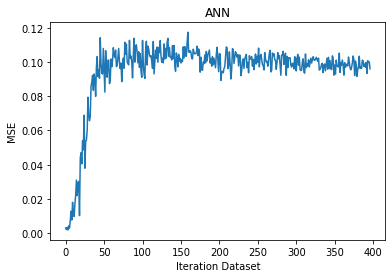

In [48]:
plt.plot(ms_trains[0:])#, label=fi.name())
plt.ylabel('MSE')
plt.xlabel('Iteration Dataset')
plt.title('ANN')
plt.savefig('./ANN.png')
plt.show()

In [49]:
print("mse train",np.asarray(ms_train).mean())
print("mse test",np.asarray(ms_test).mean())

mse train 0.09476821216162504
mse test 0.09590872947750902


ANN 2

from keras.models import Sequential
from keras.layers.core import Dense, Activation


model = Sequential()
model.add(Dense(128, input_dim=4))
model.add(Activation('sigmoid'))
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mae'])
model.summary()

model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)
rmse = sqrt(mean_squared_error(y_train,y_train_pred_ann))
print("Train : {:0.8f}".format(rmse))

rmse = sqrt(mean_squared_error(y_test,y_pred_test_ann))
print("Test : {:0.8f}".format(rmse))

model.save('Uber_ANN')

 ## SVM

In [43]:
from sklearn.svm import SVR
from sklearn import metrics
svc=SVR() #Default hyperparameters

In [44]:
ms_train = []
ms_test = []
for i in range(3,400):#len(data) - 9):
    chunk = data[0:i]
    X=chunk[['a','b','c','d']]
    # labels y are one-hot encoded, so it appears as two classes 
    y = np.array(chunk["e"])
   # print(chunk)
    #X_train, 
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)#,random_state=100)

 #   X_train

#    y_test
    svc.fit(X_train,y_train)
    y_pred_test_ann = svc.predict(X_test)
    y_train_pred_ann = svc.predict(X_train)
    mse = (mean_squared_error(y_train,y_train_pred_ann))
    print("MSE Train : {:0.3f}".format(mse))

    mse1 = (mean_squared_error(y_test,y_pred_test_ann))
    print("MSE Test : {:0.3f}".format(mse1))#y_pred=svc.predict(X_test)

   
    ms_train.append(mse)
    ms_test.append(mse1)
    #model.save('Uber_ANN')

    
  #  Evaluating the model

    score = model.evaluate(X_test, y_test)
    print('chunk', i , '=',score)
    
    '''
    
    
    y_pred_test_ann = svc.predict(X_test)
    y_train_pred_ann = svc.predict(X_train)
    rmse = sqrt(mean_squared_error(y_train,y_train_pred_ann))
    print("Train : {:0.3f}".format(rmse))

    rmse = sqrt(mean_squared_error(y_test,y_pred_test_ann))
    print("Test : {:0.3f}".format(rmse))

    model.save('Uber_ANN')

    print(y_pred_test_ann, y_train_pred_ann)
    '''

MSE Train : 0.005
MSE Test : 0.001
1/1 [==============================] - 0s 4ms/step
chunk 3 = [0.003163769841194153, 0.0]
MSE Train : 0.005
MSE Test : 0.001
2/2 [==============================] - 0s 2ms/step
chunk 4 = [0.004398394376039505, 0.0]
MSE Train : 0.007
MSE Test : 0.001
2/2 [==============================] - 0s 509us/step
chunk 5 = [0.0030719873029738665, 0.0]
MSE Train : 0.005
MSE Test : 0.005
2/2 [==============================] - 0s 1ms/step
chunk 6 = [0.013863744214177132, 0.0]
MSE Train : 0.006
MSE Test : 0.008
3/3 [==============================] - 0s 0us/step
chunk 7 = [0.012943897396326065, 0.0]
MSE Train : 0.007
MSE Test : 0.008
3/3 [==============================] - 0s 851us/step
chunk 8 = [0.0035449534188956022, 0.0]
MSE Train : 0.002
MSE Test : 0.026
3/3 [==============================] - 0s 735us/step
chunk 9 = [0.022278642281889915, 0.0]
MSE Train : 0.008
MSE Test : 0.010
3/3 [==============================] - 0s 333us/step
chunk 10 = [0.011465002782642841, 0.

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 15 = [0.025637516751885414, 0.0]
MSE Train : 0.012
MSE Test : 0.024
5/5 [==============================] - 0s 913us/step
chunk 16 = [0.019432852044701576, 0.0]
MSE Train : 0.015
MSE Test : 0.028
6/6 [==============================] - 0s 557us/step
chunk 17 = [0.036426182836294174, 0.0]
MSE Train : 0.016
MSE Test : 0.018
6/6 [==============================] - 0s 882us/step
chunk 18 = [0.02148817665874958, 0.0]
MSE Train : 0.017
MSE Test : 0.020
6/6 [==============================] - 0s 723us/step
chunk 19 = [0.021777115762233734, 0.0]
MSE Train : 0.015
MSE Test : 0.054
6/6 [==============================] - 0s 535us/step
chunk 20 = [0.07159583270549774, 0.0]
MSE Train : 0.016
MSE Test : 0.040
7/7 [==============================] - 0s 550us/step
chunk 21 = [0.050688572227954865, 0.0]
MSE Train : 0.019
MSE Test : 0.026
7/7 [==============================] - 0s 659us/step
chunk 22 = [0.06590314954519272, 0.0]


c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

MSE Train : 0.019
MSE Test : 0.028
7/7 [==============================] - 0s 362us/step
chunk 23 = [0.05087239667773247, 0.0]
MSE Train : 0.020
MSE Test : 0.031
8/8 [==============================] - 0s 438us/step
chunk 24 = [0.0703175961971283, 0.0]
MSE Train : 0.011
MSE Test : 0.027
8/8 [==============================] - 0s 326us/step
chunk 25 = [0.01880703493952751, 0.0]
MSE Train : 0.021
MSE Test : 0.023
8/8 [==============================] - 0s 486us/step
chunk 26 = [0.033409539610147476, 0.0]
MSE Train : 0.022
MSE Test : 0.018
9/9 [==============================] - 0s 0us/step
chunk 27 = [0.08712759613990784, 0.0]
MSE Train : 0.021
MSE Test : 0.006
9/9 [==============================] - 0s 383us/step
chunk 28 = [0.0418325699865818, 0.0]
MSE Train : 0.015
MSE Test : 0.027
9/9 [==============================] - 0s 233us/step
chunk 29 = [0.05780240520834923, 0.0]
MSE Train : 0.019
MSE Test : 0.028
9/9 [==============================] - 0s 305us/step
chunk 30 = [0.09608987718820572, 

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 36 = [0.0983104407787323, 0.0]
MSE Train : 0.014
MSE Test : 0.040
12/12 [==============================] - 0s 268us/step
chunk 37 = [0.1938823014497757, 0.0]
MSE Train : 0.017
MSE Test : 0.027
12/12 [==============================] - 0s 227us/step
chunk 38 = [0.1454247236251831, 0.0]
MSE Train : 0.017
MSE Test : 0.027
12/12 [==============================] - 0s 448us/step
chunk 39 = [0.12565872073173523, 0.0]
MSE Train : 0.018
MSE Test : 0.013
12/12 [==============================] - 0s 83us/step
chunk 40 = [0.16934973001480103, 0.0]
MSE Train : 0.022
MSE Test : 0.018
13/13 [==============================] - 0s 360us/step
chunk 41 = [0.1631934940814972, 0.0]
MSE Train : 0.016
MSE Test : 0.024
13/13 [==============================] - 0s 211us/step
chunk 42 = [0.0931132510304451, 0.0]
MSE Train : 0.016
MSE Test : 0.030
13/13 [==============================] - 0s 181us/step
chunk 43 = [0.16536381840705872, 0.0]
MSE Train : 0.017
MSE Test : 0.029
14/14 [==============================

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

15/15 [==============================] - 0s 313us/step
chunk 48 = [0.11766587197780609, 0.0]
MSE Train : 0.019
MSE Test : 0.013
15/15 [==============================] - 0s 232us/step
chunk 49 = [0.16215358674526215, 0.0]
MSE Train : 0.018
MSE Test : 0.015
15/15 [==============================] - 0s 150us/step
chunk 50 = [0.20744387805461884, 0.0]
MSE Train : 0.017
MSE Test : 0.029
16/16 [==============================] - 0s 265us/step
chunk 51 = [0.17510375380516052, 0.0]
MSE Train : 0.017
MSE Test : 0.017
16/16 [==============================] - 0s 0us/step
chunk 52 = [0.16677013039588928, 0.0]
MSE Train : 0.018
MSE Test : 0.017
16/16 [==============================] - 0s 112us/step
chunk 53 = [0.29995179176330566, 0.0]
MSE Train : 0.017
MSE Test : 0.013
17/17 [==============================] - 0s 122us/step
chunk 54 = [0.1302730292081833, 0.0]
MSE Train : 0.017
MSE Test : 0.023
17/17 [==============================] - 0s 0us/step
chunk 55 = [0.19167867302894592, 0.0]
MSE Train : 0.01

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

MSE Train : 0.015
MSE Test : 0.019
19/19 [==============================] - 0s 156us/step
chunk 61 = [0.17488396167755127, 0.0]
MSE Train : 0.016
MSE Test : 0.026
19/19 [==============================] - 0s 227us/step
chunk 62 = [0.19238923490047455, 0.0]
MSE Train : 0.015
MSE Test : 0.017
19/19 [==============================] - 0s 0us/step
chunk 63 = [0.24618668854236603, 0.0]
MSE Train : 0.017
MSE Test : 0.013
20/20 [==============================] - 0s 97us/step
chunk 64 = [0.21070270240306854, 0.0]
MSE Train : 0.014
MSE Test : 0.030
20/20 [==============================] - 0s 223us/step
chunk 65 = [0.20953361690044403, 0.0]
MSE Train : 0.018
MSE Test : 0.015
20/20 [==============================] - 0s 50us/step
chunk 66 = [0.23158922791481018, 0.0]
MSE Train : 0.017
MSE Test : 0.011
21/21 [==============================] - 0s 138us/step
chunk 67 = [0.13517767190933228, 0.0]
MSE Train : 0.013
MSE Test : 0.025
21/21 [==============================] - 0s 103us/step
chunk 68 = [0.2209

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 


MSE Test : 0.025
22/22 [==============================] - 0s 107us/step
chunk 73 = [0.17123530805110931, 0.0]
MSE Train : 0.013
MSE Test : 0.012
23/23 [==============================] - 0s 198us/step
chunk 74 = [0.26252123713493347, 0.0]
MSE Train : 0.013
MSE Test : 0.016
23/23 [==============================] - 0s 111us/step
chunk 75 = [0.2039751410484314, 0.0]
MSE Train : 0.014
MSE Test : 0.012
23/23 [==============================] - 0s 175us/step
chunk 76 = [0.1864183098077774, 0.0]
MSE Train : 0.015
MSE Test : 0.010
24/24 [==============================] - 0s 112us/step
chunk 77 = [0.15400686860084534, 0.0]
MSE Train : 0.014
MSE Test : 0.011
24/24 [==============================] - 0s 141us/step
chunk 78 = [0.21239590644836426, 0.0]
MSE Train : 0.013
MSE Test : 0.023
24/24 [==============================] - 0s 83us/step
chunk 79 = [0.2084556668996811, 0.0]
MSE Train : 0.012
MSE Test : 0.022
24/24 [==============================] - 0s 167us/step
chunk 80 = [0.1753605157136917, 0.0

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 82 = [0.3164268434047699, 0.0]
MSE Train : 0.013
MSE Test : 0.014
25/25 [==============================] - 0s 175us/step
chunk 83 = [0.2952577471733093, 0.0]
MSE Train : 0.013
MSE Test : 0.006
26/26 [==============================] - 0s 114us/step
chunk 84 = [0.30151912569999695, 0.0]
MSE Train : 0.013
MSE Test : 0.017
26/26 [==============================] - 0s 90us/step
chunk 85 = [0.1845272332429886, 0.0]
MSE Train : 0.012
MSE Test : 0.009
26/26 [==============================] - 0s 88us/step
chunk 86 = [0.21649903059005737, 0.0]
MSE Train : 0.011
MSE Test : 0.026
27/27 [==============================] - 0s 220us/step
chunk 87 = [0.14764942228794098, 0.0]
MSE Train : 0.012
MSE Test : 0.006
27/27 [==============================] - 0s 85us/step
chunk 88 = [0.2625802755355835, 0.0]
MSE Train : 0.013
MSE Test : 0.019
27/27 [==============================] - 0s 101us/step
chunk 89 = [0.15435591340065002, 0.0]
MSE Train : 0.012
MSE Test : 0.010
28/28 [==============================]

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

MSE Train : 0.013
MSE Test : 0.015
28/28 [==============================] - 0s 36us/step
chunk 92 = [0.2674044072628021, 0.0]
MSE Train : 0.011
MSE Test : 0.007
28/28 [==============================] - 0s 75us/step
chunk 93 = [0.3187990188598633, 0.0]
MSE Train : 0.011
MSE Test : 0.011
29/29 [==============================] - 0s 120us/step
chunk 94 = [0.26113203167915344, 0.0]
MSE Train : 0.014
MSE Test : 0.015
29/29 [==============================] - 0s 72us/step
chunk 95 = [0.1813119351863861, 0.0]
MSE Train : 0.012
MSE Test : 0.019
29/29 [==============================] - 0s 55us/step
chunk 96 = [0.24525947868824005, 0.0]
MSE Train : 0.012
MSE Test : 0.018
30/30 [==============================] - 0s 33us/step
chunk 97 = [0.20694349706172943, 0.0]
MSE Train : 0.012
MSE Test : 0.012
30/30 [==============================] - 0s 370us/step
chunk 98 = [0.2158612310886383, 0.0]
MSE Train : 0.012
MSE Test : 0.016
30/30 [==============================] - 0s 73us/step
chunk 99 = [0.2276937812

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 100 = [0.2127944380044937, 0.0]
MSE Train : 0.011
MSE Test : 0.010
31/31 [==============================] - 0s 103us/step
chunk 101 = [0.2560746669769287, 0.0]
MSE Train : 0.012
MSE Test : 0.008
31/31 [==============================] - 0s 188us/step
chunk 102 = [0.28687044978141785, 0.0]
MSE Train : 0.011
MSE Test : 0.009
31/31 [==============================] - 0s 150us/step
chunk 103 = [0.25079232454299927, 0.0]
MSE Train : 0.013
MSE Test : 0.008
32/32 [==============================] - 0s 94us/step
chunk 104 = [0.2884696125984192, 0.0]
MSE Train : 0.012
MSE Test : 0.015
32/32 [==============================] - 0s 73us/step
chunk 105 = [0.24941085278987885, 0.0]
MSE Train : 0.011
MSE Test : 0.008
32/32 [==============================] - 0s 31us/step
chunk 106 = [0.28138673305511475, 0.0]
MSE Train : 0.010
MSE Test : 0.016
33/33 [==============================] - 0s 332us/step
chunk 107 = [0.2679353261535818, 0.0]
MSE Train : 0.010
MSE Test : 0.008
32/33 [=======================

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

33/33 [==============================] - 0s 394us/step
chunk 108 = [0.25138984123865765, 0.0]
MSE Train : 0.012
MSE Test : 0.014
33/33 [==============================] - 0s 237us/step
chunk 109 = [0.2170290621844205, 0.0]
MSE Train : 0.011
MSE Test : 0.015
33/33 [==============================] - 0s 267us/step
chunk 110 = [0.2806226768615571, 0.0]
MSE Train : 0.013
MSE Test : 0.010
34/34 [==============================] - 0s 213us/step
chunk 111 = [0.1985262969837469, 0.0]
MSE Train : 0.010
MSE Test : 0.008
34/34 [==============================] - 0s 388us/step
chunk 112 = [0.2800442646531498, 0.0]
MSE Train : 0.009
MSE Test : 0.008
34/34 [==============================] - 0s 312us/step
chunk 113 = [0.22024159221088185, 0.0]
MSE Train : 0.011
MSE Test : 0.007
35/35 [==============================] - 0s 171us/step


c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 114 = [0.24211818831307547, 0.0]
MSE Train : 0.010
MSE Test : 0.013
35/35 [==============================] - 0s 206us/step
chunk 115 = [0.2428018774305071, 0.0]
MSE Train : 0.011
MSE Test : 0.011
35/35 [==============================] - 0s 151us/step
chunk 116 = [0.228114715218544, 0.0]
MSE Train : 0.009
MSE Test : 0.010
36/36 [==============================] - 0s 184us/step
chunk 117 = [0.2464787508878443, 0.0]
MSE Train : 0.009
MSE Test : 0.009
36/36 [==============================] - 0s 187us/step
chunk 118 = [0.21190035508738625, 0.0]
MSE Train : 0.009
MSE Test : 0.018
36/36 [==============================] - 0s 195us/step
chunk 119 = [0.2216050624847412, 0.0]
MSE Train : 0.009
MSE Test : 0.008
36/36 [==============================] - 0s 210us/step
chunk 120 = [0.2402185458276007, 0.0]
MSE Train : 0.010
MSE Test : 0.014
37/37 [==============================] - 0s 164us/step
chunk 121 = [0.2581150974776294, 0.0]
MSE Train : 0.009
MSE Test : 0.008
37/37 [=======================

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

38/38 [==============================] - 0s 203us/step
chunk 125 = [0.27065578887337133, 0.0]
MSE Train : 0.010
MSE Test : 0.006
38/38 [==============================] - 0s 196us/step
chunk 126 = [0.3291428230310741, 0.0]
MSE Train : 0.009
MSE Test : 0.010
39/39 [==============================] - 0s 107us/step
chunk 127 = [0.32044501029528105, 0.0]
MSE Train : 0.009
MSE Test : 0.011
39/39 [==============================] - 0s 160us/step
chunk 128 = [0.25273957733924574, 0.0]
MSE Train : 0.010
MSE Test : 0.007
39/39 [==============================] - 0s 263us/step
chunk 129 = [0.3305407342238304, 0.0]
MSE Train : 0.009
MSE Test : 0.011
39/39 [==============================] - 0s 169us/step
chunk 130 = [0.2852008797419377, 0.0]
MSE Train : 0.009
MSE Test : 0.012
40/40 [==============================] - 0s 202us/step
chunk 131 = [0.22336457073688507, 0.0]
MSE Train : 0.010
MSE Test : 0.008
40/40 [==============================] - 0s 187us/step
chunk 132 = [0.23666319251060486, 0.0]
MSE Tr

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 134 = [0.24261830456373168, 0.0]
MSE Train : 0.008
MSE Test : 0.019
41/41 [==============================] - 0s 234us/step
chunk 135 = [0.22965619985650226, 0.0]
MSE Train : 0.009
MSE Test : 0.015
41/41 [==============================] - 0s 162us/step
chunk 136 = [0.2286638123233144, 0.0]
MSE Train : 0.009
MSE Test : 0.012
42/42 [==============================] - 0s 163us/step
chunk 137 = [0.3027646839618683, 0.0]
MSE Train : 0.010
MSE Test : 0.008
42/42 [==============================] - 0s 202us/step
chunk 138 = [0.26249923024858746, 0.0]
MSE Train : 0.009
MSE Test : 0.011
42/42 [==============================] - 0s 195us/step
chunk 139 = [0.26230520719573613, 0.0]
MSE Train : 0.010
MSE Test : 0.008
42/42 [==============================] - 0s 118us/step
chunk 140 = [0.2884345707439241, 0.0]
MSE Train : 0.010
MSE Test : 0.008
43/43 [==============================] - 0s 140us/step
chunk 141 = [0.2724660881036936, 0.0]
MSE Train : 0.010
MSE Test : 0.011
43/43 [====================

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

44/44 [==============================] - 0s 218us/step
chunk 144 = [0.25088159062645654, 0.0]
MSE Train : 0.009
MSE Test : 0.009
44/44 [==============================] - 0s 197us/step
chunk 145 = [0.20618394830010153, 0.0]
MSE Train : 0.009
MSE Test : 0.009
44/44 [==============================] - 0s 90us/step
chunk 146 = [0.26758149537173187, 0.0]
MSE Train : 0.008
MSE Test : 0.011
45/45 [==============================] - 0s 196us/step
chunk 147 = [0.24004102382395004, 0.0]
MSE Train : 0.008
MSE Test : 0.009
45/45 [==============================] - 0s 147us/step
chunk 148 = [0.25189212097062, 0.0]
MSE Train : 0.008
MSE Test : 0.009
45/45 [==============================] - 0s 161us/step
chunk 149 = [0.23697449465592701, 0.0]
MSE Train : 0.009
MSE Test : 0.010
45/45 [==============================] - 0s 150us/step
chunk 150 = [0.25650019778145683, 0.0]
MSE Train : 0.009
MSE Test : 0.011
46/46 [==============================] - ETA:  - 0s 127us/step
chunk 151 = [0.2381285169850225, 0.0]


c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 


MSE Test : 0.010
47/47 [==============================] - 0s 213us/step
chunk 154 = [0.2514077599378342, 0.0]
MSE Train : 0.009
MSE Test : 0.008
47/47 [==============================] - 0s 171us/step
chunk 155 = [0.2869938757825405, 0.0]
MSE Train : 0.009
MSE Test : 0.008
47/47 [==============================] - 0s 142us/step
chunk 156 = [0.2817889990958762, 0.0]
MSE Train : 0.010
MSE Test : 0.007
48/48 [==============================] - 0s 156us/step
chunk 157 = [0.3099035123984019, 0.0]
MSE Train : 0.009
MSE Test : 0.010
48/48 [==============================] - 0s 129us/step
chunk 158 = [0.2713565429051717, 0.0]
MSE Train : 0.009
MSE Test : 0.007
48/48 [==============================] - 0s 168us/step
chunk 159 = [0.34333516160647076, 0.0]
MSE Train : 0.008
MSE Test : 0.014
48/48 [==============================] - 0s 241us/step
chunk 160 = [0.2433229386806488, 0.0]
MSE Train : 0.009
MSE Test : 0.009
49/49 [==============================] - 0s 181us/step
chunk 161 = [0.249547483969707

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 162 = [0.22930432521567054, 0.0]
MSE Train : 0.008
MSE Test : 0.011
49/49 [==============================] - 0s 129us/step
chunk 163 = [0.2769515471799033, 0.0]
MSE Train : 0.008
MSE Test : 0.008
50/50 [==============================] - 0s 137us/step
chunk 164 = [0.25134499073028566, 0.0]
MSE Train : 0.008
MSE Test : 0.008
50/50 [==============================] - 0s 169us/step
chunk 165 = [0.21123363256454467, 0.0]
MSE Train : 0.009
MSE Test : 0.009
50/50 [==============================] - 0s 194us/step
chunk 166 = [0.2767933189868927, 0.0]
MSE Train : 0.008
MSE Test : 0.008
51/51 [==============================] - 0s 104us/step
chunk 167 = [0.2755364559444727, 0.0]
MSE Train : 0.009
MSE Test : 0.011
51/51 [==============================] - 0s 113us/step
chunk 168 = [0.2309495304145065, 0.0]
MSE Train : 0.008
MSE Test : 0.012
51/51 [==============================] - 0s 129us/step
chunk 169 = [0.28053028969203725, 0.0]
MSE Train : 0.008
MSE Test : 0.010
52/52 [====================

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 172 = [0.28009733901574063, 0.0]
MSE Train : 0.009
MSE Test : 0.007
52/52 [==============================] - 0s 139us/step
chunk 173 = [0.2696979802388411, 0.0]
MSE Train : 0.009
MSE Test : 0.013
53/53 [==============================] - 0s 87us/step
chunk 174 = [0.18864549949484052, 0.0]
MSE Train : 0.008
MSE Test : 0.010
53/53 [==============================] - 0s 164us/step
chunk 175 = [0.2597109149649458, 0.0]
MSE Train : 0.009
MSE Test : 0.009
53/53 [==============================] - 0s 104us/step
chunk 176 = [0.24975322777370237, 0.0]
MSE Train : 0.007
MSE Test : 0.012
54/54 [==============================] - 0s 98us/step
chunk 177 = [0.2572594671337693, 0.0]
MSE Train : 0.008
MSE Test : 0.007
54/54 [==============================] - 0s 159us/step
chunk 178 = [0.2838256061077118, 0.0]
MSE Train : 0.008
MSE Test : 0.014
54/54 [==============================] - 0s 101us/step
chunk 179 = [0.27534613730730834, 0.0]
MSE Train : 0.008
MSE Test : 0.010
55/55 [======================

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

183 = [0.25992379920049147, 0.0]
MSE Train : 0.007
MSE Test : 0.013
56/56 [==============================] - 0s 98us/step
chunk 184 = [0.22431130068642752, 0.0]
MSE Train : 0.008
MSE Test : 0.007
56/56 [==============================] - 0s 86us/step
chunk 185 = [0.2597500426428659, 0.0]
MSE Train : 0.007
MSE Test : 0.012
56/56 [==============================] - 0s 124us/step
chunk 186 = [0.26463096908160616, 0.0]
MSE Train : 0.007
MSE Test : 0.010
57/57 [==============================] - 0s 104us/step
chunk 187 = [0.2689465320946878, 0.0]
MSE Train : 0.008
MSE Test : 0.010
57/57 [==============================] - 0s 102us/step
chunk 188 = [0.27519389830137553, 0.0]
MSE Train : 0.009
MSE Test : 0.007
57/57 [==============================] - 0s 132us/step
chunk 189 = [0.24043479431093784, 0.0]
MSE Train : 0.008
MSE Test : 0.007
57/57 [==============================] - 0s 140us/step
chunk 190 = [0.3112644427701047, 0.0]
MSE Train : 0.008
MSE Test : 0.006
58/58 [===========================

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

MSE Train : 0.008
MSE Test : 0.008
58/58 [==============================] - 0s 153us/step
chunk 193 = [0.33248942371072443, 0.0]
MSE Train : 0.008
MSE Test : 0.008
59/59 [==============================] - 0s 129us/step
chunk 194 = [0.2446465785220518, 0.0]
MSE Train : 0.008
MSE Test : 0.008
59/59 [==============================] - 0s 122us/step
chunk 195 = [0.23989593578597246, 0.0]
MSE Train : 0.008
MSE Test : 0.009
59/59 [==============================] - 0s 106us/step
chunk 196 = [0.23740773837445145, 0.0]
MSE Train : 0.008
MSE Test : 0.008
60/60 [==============================] - 0s 97us/step
chunk 197 = [0.26001966595649717, 0.0]
MSE Train : 0.008
MSE Test : 0.008
60/60 [==============================] - 0s 100us/step
chunk 198 = [0.2813763340314229, 0.0]
MSE Train : 0.008
MSE Test : 0.010
60/60 [==============================] - 0s 119us/step
chunk 199 = [0.2629950185616811, 0.0]
MSE Train : 0.008
MSE Test : 0.009
60/60 [==============================] - 0s 128us/step


c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 200 = [0.2667737305164337, 0.0]
MSE Train : 0.008
MSE Test : 0.007
61/61 [==============================] - 0s 99us/step
chunk 201 = [0.2997742935282285, 0.0]
MSE Train : 0.008
MSE Test : 0.010
61/61 [==============================] - 0s 124us/step
chunk 202 = [0.24177439339825366, 0.0]
MSE Train : 0.007
MSE Test : 0.010
61/61 [==============================] - 0s 148us/step
chunk 203 = [0.3043866040276699, 0.0]
MSE Train : 0.008
MSE Test : 0.007
62/62 [==============================] - 0s 163us/step
chunk 204 = [0.2617526208200762, 0.0]
MSE Train : 0.007
MSE Test : 0.008
62/62 [==============================] - ETA:  - 0s 87us/step
chunk 205 = [0.2724748378799808, 0.0]
MSE Train : 0.007
MSE Test : 0.008
62/62 [==============================] - 0s 136us/step
chunk 206 = [0.24906366006020578, 0.0]
MSE Train : 0.008
MSE Test : 0.007
63/63 [==============================] - 0s 157us/step
chunk 207 = [0.2727468269211905, 0.0]
MSE Train : 0.007
MSE Test : 0.007
63/63 [================

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

MSE Train : 0.007
MSE Test : 0.010
63/63 [==============================] - 0s 139us/step
chunk 209 = [0.2397104934567497, 0.0]
MSE Train : 0.007
MSE Test : 0.007
63/63 [==============================] - 0s 103us/step
chunk 210 = [0.22669942227620926, 0.0]
MSE Train : 0.008
MSE Test : 0.009
64/64 [==============================] - 0s 131us/step
chunk 211 = [0.24683807790279388, 0.0]
MSE Train : 0.007
MSE Test : 0.007
64/64 [==============================] - 0s 180us/step
chunk 212 = [0.292964830994606, 0.0]
MSE Train : 0.007
MSE Test : 0.009
64/64 [==============================] - 0s 123us/step
chunk 213 = [0.3021623343229294, 0.0]
MSE Train : 0.007
MSE Test : 0.008
65/65 [==============================] - 0s 209us/step
chunk 214 = [0.26160038927426704, 0.0]
MSE Train : 0.008
MSE Test : 0.010
65/65 [==============================] - 0s 208us/step
chunk 215 = [0.2418608349103194, 0.0]
MSE Train : 0.007
MSE Test : 0.007


c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

65/65 [==============================] - 0s 152us/step
chunk 216 = [0.2864605793586144, 0.0]
MSE Train : 0.008
MSE Test : 0.007
66/66 [==============================] - 0s 146us/step
chunk 217 = [0.31291102279316296, 0.0]
MSE Train : 0.007
MSE Test : 0.007
66/66 [==============================] - 0s 148us/step
chunk 218 = [0.3152959744135539, 0.0]
MSE Train : 0.008
MSE Test : 0.009
66/66 [==============================] - 0s 280us/step
chunk 219 = [0.30102833292701026, 0.0]
MSE Train : 0.008
MSE Test : 0.010
66/66 [==============================] - 0s 169us/step
chunk 220 = [0.2389955021666758, 0.0]
MSE Train : 0.007
MSE Test : 0.010
67/67 [==============================] - 0s 123us/step
chunk 221 = [0.2927552270355509, 0.0]
MSE Train : 0.008
MSE Test : 0.008
67/67 [==============================] - 0s 140us/step
chunk 222 = [0.27183200218784276, 0.0]
MSE Train : 0.008
MSE Test : 0.006
67/67 [==============================] - 0s 149us/step


c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 223 = [0.3181988196586495, 0.0]
MSE Train : 0.007
MSE Test : 0.008
68/68 [==============================] - 0s 125us/step
chunk 224 = [0.29817547342356515, 0.0]
MSE Train : 0.008
MSE Test : 0.008
68/68 [==============================] - 0s 117us/step
chunk 225 = [0.27772582979763255, 0.0]
MSE Train : 0.007
MSE Test : 0.008
68/68 [==============================] - 0s 138us/step
chunk 226 = [0.32760708034038544, 0.0]
MSE Train : 0.007
MSE Test : 0.007
69/69 [==============================] - 0s 146us/step
chunk 227 = [0.26778836829074915, 0.0]
MSE Train : 0.007
MSE Test : 0.007
69/69 [==============================] - 0s 150us/step
chunk 228 = [0.27208732133326324, 0.0]
MSE Train : 0.007
MSE Test : 0.011
69/69 [==============================] - 0s 119us/step
chunk 229 = [0.24105819800625677, 0.0]
MSE Train : 0.007
MSE Test : 0.008
69/69 [==============================] - 0s 141us/step
chunk 230 = [0.26272537138151086, 0.0]
MSE Train : 0.007
MSE Test : 0.007
70/70 [=================

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 


MSE Test : 0.009
70/70 [==============================] - 0s 129us/step
chunk 232 = [0.23055810630321502, 0.0]
MSE Train : 0.007
MSE Test : 0.008
70/70 [==============================] - 0s 134us/step
chunk 233 = [0.23514883390494756, 0.0]
MSE Train : 0.007
MSE Test : 0.008
71/71 [==============================] - 0s 133us/step
chunk 234 = [0.2937633626058068, 0.0]
MSE Train : 0.007
MSE Test : 0.010
71/71 [==============================] - 0s 114us/step
chunk 235 = [0.2408455916693513, 0.0]
MSE Train : 0.008
MSE Test : 0.011
71/71 [==============================] - 0s 154us/step
chunk 236 = [0.2366393739488763, 0.0]
MSE Train : 0.007
MSE Test : 0.007
72/72 [==============================] - 0s 127us/step
chunk 237 = [0.2738318178388808, 0.0]
MSE Train : 0.008
MSE Test : 0.006
72/72 [==============================] - ETA:  - 0s 136us/step
chunk 238 = [0.29008511039945817, 0.0]
MSE Train : 0.007
MSE Test : 0.007
72/72 [==============================] - 0s 77us/step


c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 239 = [0.30576154920789933, 0.0]
MSE Train : 0.007
MSE Test : 0.008
72/72 [==============================] - 0s 145us/step
chunk 240 = [0.24851091702779135, 0.0]
MSE Train : 0.007
MSE Test : 0.008
73/73 [==============================] - 0s 108us/step
chunk 241 = [0.2681110664589764, 0.0]
MSE Train : 0.007
MSE Test : 0.006
73/73 [==============================] - 0s 141us/step
chunk 242 = [0.2810148086449871, 0.0]
MSE Train : 0.007
MSE Test : 0.006
73/73 [==============================] - 0s 121us/step
chunk 243 = [0.277286097407341, 0.0]
MSE Train : 0.008
MSE Test : 0.008
74/74 [==============================] - 0s 152us/step
chunk 244 = [0.3132139428241833, 0.0]
MSE Train : 0.007
MSE Test : 0.008
74/74 [==============================] - 0s 107us/step
chunk 245 = [0.29293191835686966, 0.0]
MSE Train : 0.007
MSE Test : 0.007
74/74 [==============================] - 0s 119us/step
chunk 246 = [0.3058641585143837, 0.0]
MSE Train : 0.007
MSE Test : 0.007
75/75 [======================

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 248 = [0.28432929078737895, 0.0]
MSE Train : 0.007
MSE Test : 0.010
75/75 [==============================] - 0s 115us/step
chunk 249 = [0.3008284894625346, 0.0]
MSE Train : 0.007
MSE Test : 0.006
75/75 [==============================] - 0s 132us/step
chunk 250 = [0.3177703376611074, 0.0]
MSE Train : 0.007
MSE Test : 0.006
76/76 [==============================] - 0s 118us/step
chunk 251 = [0.31304350024775457, 0.0]
MSE Train : 0.007
MSE Test : 0.007
76/76 [==============================] - 0s 113us/step
chunk 252 = [0.2921072542667389, 0.0]
MSE Train : 0.007
MSE Test : 0.007
76/76 [==============================] - 0s 101us/step
chunk 253 = [0.2680041907649291, 0.0]
MSE Train : 0.007
MSE Test : 0.007
77/77 [==============================] - 0s 139us/step
chunk 254 = [0.31196316767048526, 0.0]
MSE Train : 0.007
MSE Test : 0.007
77/77 [==============================] - 0s 134us/step
chunk 255 = [0.3036064149497391, 0.0]
MSE Train : 0.007
MSE Test : 0.011
77/77 [=====================

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 256 = [0.2682870912861514, 0.0]
MSE Train : 0.007
MSE Test : 0.006
78/78 [==============================] - 0s 131us/step
chunk 257 = [0.2969192778452849, 0.0]
MSE Train : 0.006
MSE Test : 0.010
78/78 [==============================] - 0s 103us/step
chunk 258 = [0.2555296814594513, 0.0]
MSE Train : 0.007
MSE Test : 0.006
78/78 [==============================] - 0s 99us/step
chunk 259 = [0.2826469185260626, 0.0]
MSE Train : 0.007
MSE Test : 0.007
78/78 [==============================] - 0s 63us/step
chunk 260 = [0.3196350381924556, 0.0]
MSE Train : 0.007
MSE Test : 0.008
79/79 [==============================] - 0s 107us/step
chunk 261 = [0.2580675482749939, 0.0]
MSE Train : 0.007
MSE Test : 0.007
79/79 [==============================] - 0s 101us/step
chunk 262 = [0.3081213454656963, 0.0]
MSE Train : 0.007
MSE Test : 0.006
79/79 [==============================] - 0s 108us/step
chunk 263 = [0.27495124332512483, 0.0]
MSE Train : 0.007
MSE Test : 0.008
80/80 [=========================

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 264 = [0.3128526508808136, 0.0]
MSE Train : 0.007
MSE Test : 0.006
80/80 [==============================] - 0s 207us/step
chunk 265 = [0.31118851006031034, 0.0]
MSE Train : 0.007
MSE Test : 0.008
80/80 [==============================] - 0s 112us/step
chunk 266 = [0.2939342617988586, 0.0]
MSE Train : 0.007
MSE Test : 0.008
81/81 [==============================] - 0s 96us/step
chunk 267 = [0.2897958556811015, 0.0]
MSE Train : 0.007
MSE Test : 0.007
81/81 [==============================] - 0s 99us/step
chunk 268 = [0.2761807750772547, 0.0]
MSE Train : 0.007
MSE Test : 0.006
81/81 [==============================] - 0s 96us/step
chunk 269 = [0.30070335960682526, 0.0]
MSE Train : 0.006
MSE Test : 0.007
81/81 [==============================] - 0s 103us/step
chunk 270 = [0.3082518831447319, 0.0]
MSE Train : 0.006
MSE Test : 0.006
82/82 [==============================] - 0s 101us/step
chunk 271 = [0.30876122524098654, 0.0]
MSE Train : 0.007
MSE Test : 0.005
82/82 [========================

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 273 = [0.30751567788240386, 0.0]
MSE Train : 0.007
MSE Test : 0.006
83/83 [==============================] - 0s 198us/step
chunk 274 = [0.26244643186948385, 0.0]
MSE Train : 0.007
MSE Test : 0.008
83/83 [==============================] - 0s 125us/step
chunk 275 = [0.2768502741693014, 0.0]
MSE Train : 0.006
MSE Test : 0.007
83/83 [==============================] - 0s 91us/step
chunk 276 = [0.28487270316445684, 0.0]
MSE Train : 0.007
MSE Test : 0.006
84/84 [==============================] - 0s 113us/step
chunk 277 = [0.2747601448070435, 0.0]
MSE Train : 0.007
MSE Test : 0.005
84/84 [==============================] - 0s 123us/step
chunk 278 = [0.3470549838883536, 0.0]
MSE Train : 0.007
MSE Test : 0.008
84/84 [==============================] - 0s 82us/step
chunk 279 = [0.2567257086435954, 0.0]
MSE Train : 0.007
MSE Test : 0.007
84/84 [==============================] - 0s 174us/step
chunk 280 = [0.25258716231300715, 0.0]
MSE Train : 0.007
MSE Test : 0.006
85/85 [======================

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

85/85 [==============================] - 0s 133us/step
chunk 282 = [0.2652040050310247, 0.0]
MSE Train : 0.006
MSE Test : 0.008
85/85 [==============================] - 0s 105us/step
chunk 283 = [0.28265545578563916, 0.0]
MSE Train : 0.007
MSE Test : 0.006
86/86 [==============================] - 0s 75us/step
chunk 284 = [0.314975370501363, 0.0]
MSE Train : 0.006
MSE Test : 0.010
86/86 [==============================] - 0s 96us/step
chunk 285 = [0.2396348465320676, 0.0]
MSE Train : 0.007
MSE Test : 0.006
86/86 [==============================] - 0s 118us/step
chunk 286 = [0.3044884759326314, 0.0]
MSE Train : 0.006
MSE Test : 0.007
87/87 [==============================] - 0s 118us/step
chunk 287 = [0.2579062558796214, 0.0]
MSE Train : 0.007
MSE Test : 0.007
87/87 [==============================] - 0s 103us/step
chunk 288 = [0.2869033820327671, 0.0]
MSE Train : 0.006
MSE Test : 0.009
87/87 [==============================] - 0s 126us/step
chunk 289 = [0.2902911764451827, 0.0]
MSE Train : 0

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

87/87 [==============================] - 0s 103us/step
chunk 290 = [0.28795255600720987, 0.0]
MSE Train : 0.007
MSE Test : 0.007
88/88 [==============================] - 0s 101us/step
chunk 291 = [0.27676308967850427, 0.0]
MSE Train : 0.006
MSE Test : 0.007
88/88 [==============================] - 0s 108us/step
chunk 292 = [0.18809695135463367, 0.0]
MSE Train : 0.007
MSE Test : 0.007
88/88 [==============================] - 0s 103us/step
chunk 293 = [0.2628543038259853, 0.0]
MSE Train : 0.007
MSE Test : 0.006
89/89 [==============================] - 0s 119us/step
chunk 294 = [0.2652140266439888, 0.0]
MSE Train : 0.007
MSE Test : 0.007
89/89 [==============================] - 0s 75us/step
chunk 295 = [0.26283827357077866, 0.0]
MSE Train : 0.007
MSE Test : 0.006
89/89 [==============================] - 0s 137us/step
chunk 296 = [0.2959701321767957, 0.0]
MSE Train : 0.007
MSE Test : 0.005
90/90 [==============================] - 0s 86us/step
chunk 297 = [0.23525522417492337, 0.0]
MSE Trai

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 


MSE Test : 0.008
90/90 [==============================] - 0s 145us/step
chunk 299 = [0.29845306078592937, 0.0]
MSE Train : 0.006
MSE Test : 0.007
90/90 [==============================] - 0s 125us/step
chunk 300 = [0.2519316653410594, 0.0]
MSE Train : 0.006
MSE Test : 0.006
91/91 [==============================] - 0s 68us/step
chunk 301 = [0.2657665521888943, 0.0]
MSE Train : 0.006
MSE Test : 0.005
91/91 [==============================] - 0s 123us/step
chunk 302 = [0.31496991823007775, 0.0]
MSE Train : 0.006
MSE Test : 0.008
91/91 [==============================] - 0s 100us/step
chunk 303 = [0.2740032794056358, 0.0]
MSE Train : 0.007
MSE Test : 0.006
92/92 [==============================] - 0s 89us/step
chunk 304 = [0.31376337357189343, 0.0]
MSE Train : 0.007
MSE Test : 0.006
92/92 [==============================] - 0s 80us/step
chunk 305 = [0.27207958957423334, 0.0]
MSE Train : 0.006
MSE Test : 0.007
92/92 [==============================] - 0s 91us/step
chunk 306 = [0.3263831592124441

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

MSE Train : 0.006
MSE Test : 0.008
93/93 [==============================] - 0s 100us/step
chunk 308 = [0.3234435400014283, 0.0]
MSE Train : 0.007
MSE Test : 0.007
93/93 [==============================] - 0s 90us/step
chunk 309 = [0.2909416660506238, 0.0]
MSE Train : 0.006
MSE Test : 0.006
93/93 [==============================] - 0s 139us/step
chunk 310 = [0.2865639732730004, 0.0]
MSE Train : 0.006
MSE Test : 0.005
94/94 [==============================] - 0s 131us/step
chunk 311 = [0.29516156746986066, 0.0]
MSE Train : 0.006
MSE Test : 0.008
94/94 [==============================] - 0s 82us/step
chunk 312 = [0.2922157454997935, 0.0]
MSE Train : 0.007
MSE Test : 0.005
94/94 [==============================] - 0s 89us/step
chunk 313 = [0.32156886318896677, 0.0]
MSE Train : 0.006
MSE Test : 0.006
95/95 [==============================] - 0s 121us/step
chunk 314 = [0.27875689770046036, 0.0]
MSE Train : 0.007
MSE Test : 0.007
95/95 [==============================] - 0s 96us/step
chunk 315 = [0.

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

95/95 [==============================] - 0s 111us/step
chunk 316 = [0.3017403709261041, 0.0]
MSE Train : 0.006
MSE Test : 0.008
96/96 [==============================] - 0s 71us/step
chunk 317 = [0.2680271416902542, 0.0]
MSE Train : 0.007
MSE Test : 0.007
96/96 [==============================] - 0s 107us/step
chunk 318 = [0.28138066331545514, 0.0]
MSE Train : 0.006
MSE Test : 0.008
96/96 [==============================] - 0s 91us/step
chunk 319 = [0.28304193417231244, 0.0]
MSE Train : 0.007
MSE Test : 0.005
96/96 [==============================] - 0s 127us/step
chunk 320 = [0.2820541014273961, 0.0]
MSE Train : 0.006
MSE Test : 0.007
97/97 [==============================] - 0s 126us/step
chunk 321 = [0.2867996098147225, 0.0]
MSE Train : 0.006
MSE Test : 0.006
97/97 [==============================] - 0s 127us/step
chunk 322 = [0.2969158917051001, 0.0]
MSE Train : 0.006
MSE Test : 0.008
97/97 [==============================] - 0s 115us/step


c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 323 = [0.315782436390513, 0.0]
MSE Train : 0.006
MSE Test : 0.008
98/98 [==============================] - 0s 112us/step
chunk 324 = [0.27138748354449566, 0.0]
MSE Train : 0.006
MSE Test : 0.006
98/98 [==============================] - 0s 89us/step
chunk 325 = [0.2850842183949996, 0.0]
MSE Train : 0.006
MSE Test : 0.007
98/98 [==============================] - 0s 128us/step
chunk 326 = [0.2885086551612737, 0.0]
MSE Train : 0.006
MSE Test : 0.006
99/99 [==============================] - 0s 161us/step
chunk 327 = [0.28651112528762435, 0.0]
MSE Train : 0.006
MSE Test : 0.006
99/99 [==============================] - 0s 91us/step
chunk 328 = [0.3237057794826199, 0.0]
MSE Train : 0.006
MSE Test : 0.006
99/99 [==============================] - 0s 136us/step
chunk 329 = [0.296145210362444, 0.0]
MSE Train : 0.006
MSE Test : 0.006
 32/100 [========>.....................] - ETA: 0s

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

100/100 [==============================] - 0s 113us/step
chunk 330 = [0.23936424374580384, 0.0]
MSE Train : 0.006
MSE Test : 0.008
100/100 [==============================] - 0s 100us/step
chunk 331 = [0.28071701526641846, 0.0]
MSE Train : 0.006
MSE Test : 0.008
100/100 [==============================] - 0s 108us/step
chunk 332 = [0.2738287401199341, 0.0]
MSE Train : 0.006
MSE Test : 0.007
100/100 [==============================] - 0s 110us/step
chunk 333 = [0.2939646935462952, 0.0]
MSE Train : 0.006
MSE Test : 0.006
101/101 [==============================] - 0s 104us/step
chunk 334 = [0.3000189484936176, 0.0]
MSE Train : 0.006
MSE Test : 0.008
101/101 [==============================] - 0s 136us/step
chunk 335 = [0.2839441479432701, 0.0]
MSE Train : 0.006
MSE Test : 0.007
101/101 [==============================] - 0s 114us/step
chunk 336 = [0.2623305005012172, 0.0]
MSE Train : 0.006
MSE Test : 0.006
102/102 [==============================] - 0s 103us/step


c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 337 = [0.32654180947472067, 0.0]
MSE Train : 0.006
MSE Test : 0.006
102/102 [==============================] - 0s 103us/step
chunk 338 = [0.3224099176187141, 0.0]
MSE Train : 0.006
MSE Test : 0.007
102/102 [==============================] - 0s 123us/step
chunk 339 = [0.3005405056710337, 0.0]
MSE Train : 0.006
MSE Test : 0.006
103/103 [==============================] - 0s 101us/step
chunk 340 = [0.30689909446586683, 0.0]
MSE Train : 0.006
MSE Test : 0.009
103/103 [==============================] - 0s 106us/step
chunk 341 = [0.2591194487312465, 0.0]
MSE Train : 0.006
MSE Test : 0.006
103/103 [==============================] - 0s 127us/step
chunk 342 = [0.3003074477598505, 0.0]
MSE Train : 0.006
MSE Test : 0.007
103/103 [==============================] - 0s 143us/step
chunk 343 = [0.3013837809122882, 0.0]
MSE Train : 0.006
MSE Test : 0.007
104/104 [==============================] - 0s 235us/step
chunk 344 = [0.27691343426704407, 0.0]


c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

MSE Train : 0.006
MSE Test : 0.007
104/104 [==============================] - 0s 142us/step
chunk 345 = [0.28230549280460066, 0.0]
MSE Train : 0.006
MSE Test : 0.006
104/104 [==============================] - 0s 111us/step
chunk 346 = [0.27546388885149586, 0.0]
MSE Train : 0.006
MSE Test : 0.006
105/105 [==============================] - 0s 126us/step
chunk 347 = [0.301069370337895, 0.0]
MSE Train : 0.006
MSE Test : 0.006
105/105 [==============================] - 0s 135us/step
chunk 348 = [0.2744450566314516, 0.0]
MSE Train : 0.006
MSE Test : 0.009
105/105 [==============================] - 0s 129us/step
chunk 349 = [0.2970371961593628, 0.0]
MSE Train : 0.006
MSE Test : 0.006
106/106 [==============================] - 0s 95us/step
chunk 350 = [0.28244967477501565, 0.0]
MSE Train : 0.006
MSE Test : 0.006
106/106 [==============================] - 0s 122us/step
chunk 351 = [0.29048662478069087, 0.0]
MSE Train : 0.006
MSE Test : 0.005
106/106 [==============================] - 0s 118us/s

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

MSE Train : 0.006
MSE Test : 0.006
106/106 [==============================] - 0s 108us/step
chunk 353 = [0.30175631001310527, 0.0]
MSE Train : 0.006
MSE Test : 0.007
107/107 [==============================] - 0s 102us/step
chunk 354 = [0.3251532594734263, 0.0]
MSE Train : 0.006
MSE Test : 0.007
107/107 [==============================] - 0s 108us/step
chunk 355 = [0.29621581050837154, 0.0]
MSE Train : 0.006
MSE Test : 0.007
107/107 [==============================] - 0s 91us/step
chunk 356 = [0.23058724514791898, 0.0]
MSE Train : 0.006
MSE Test : 0.006
108/108 [==============================] - 0s 103us/step
chunk 357 = [0.2514922210463771, 0.0]
MSE Train : 0.006
MSE Test : 0.006
108/108 [==============================] - 0s 103us/step
chunk 358 = [0.27672265304459465, 0.0]
MSE Train : 0.006
MSE Test : 0.008
108/108 [==============================] - 0s 108us/step
chunk 359 = [0.2658199651373757, 0.0]
MSE Train : 0.006
MSE Test : 0.005
109/109 [==============================] - 0s 156us/

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 360 = [0.3080113601247105, 0.0]
MSE Train : 0.006
MSE Test : 0.007
109/109 [==============================] - 0s 144us/step
chunk 361 = [0.29228785743407154, 0.0]
MSE Train : 0.006
MSE Test : 0.007
109/109 [==============================] - 0s 130us/step
chunk 362 = [0.2591969824712211, 0.0]
MSE Train : 0.006
MSE Test : 0.006
109/109 [==============================] - 0s 108us/step
chunk 363 = [0.32018807448378395, 0.0]
MSE Train : 0.006
MSE Test : 0.007
110/110 [==============================] - 0s 131us/step
chunk 364 = [0.25087726658040826, 0.0]
MSE Train : 0.006
MSE Test : 0.007
110/110 [==============================] - 0s 123us/step
chunk 365 = [0.2626617442477833, 0.0]
MSE Train : 0.006
MSE Test : 0.006
110/110 [==============================] - 0s 143us/step
chunk 366 = [0.2683008445934816, 0.0]
MSE Train : 0.006
MSE Test : 0.006
111/111 [==============================] - 0s 148us/step
chunk 367 = [0.30794762168918643, 0.0]


c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

MSE Train : 0.006
MSE Test : 0.006
111/111 [==============================] - 0s 103us/step
chunk 368 = [0.2996281796210521, 0.0]
MSE Train : 0.006
MSE Test : 0.007
111/111 [==============================] - 0s 70us/step
chunk 369 = [0.2976320372508453, 0.0]
MSE Train : 0.006
MSE Test : 0.005
111/111 [==============================] - 0s 113us/step
chunk 370 = [0.28750743441753557, 0.0]
MSE Train : 0.006
MSE Test : 0.007
112/112 [==============================] - 0s 88us/step
chunk 371 = [0.27095954971654074, 0.0]
MSE Train : 0.006
MSE Test : 0.006
112/112 [==============================] - 0s 117us/step
chunk 372 = [0.2679831726210458, 0.0]
MSE Train : 0.006
MSE Test : 0.008
112/112 [==============================] - 0s 149us/step
chunk 373 = [0.2815706431865692, 0.0]
MSE Train : 0.006
MSE Test : 0.006
113/113 [==============================] - 0s 130us/step
chunk 374 = [0.3230661362145854, 0.0]
MSE Train : 0.006
MSE Test : 0.008
 32/113 [=======>......................] - ETA: 0s

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

113/113 [==============================] - 0s 93us/step
chunk 375 = [0.2871893370046025, 0.0]
MSE Train : 0.006
MSE Test : 0.007
113/113 [==============================] - 0s 113us/step
chunk 376 = [0.2752877355149362, 0.0]
MSE Train : 0.006
MSE Test : 0.005
114/114 [==============================] - 0s 97us/step
chunk 377 = [0.2851637633223283, 0.0]
MSE Train : 0.006
MSE Test : 0.006
114/114 [==============================] - 0s 103us/step
chunk 378 = [0.29381837682765827, 0.0]
MSE Train : 0.006
MSE Test : 0.008
114/114 [==============================] - 0s 121us/step
chunk 379 = [0.2791610914364196, 0.0]
MSE Train : 0.005
MSE Test : 0.007
114/114 [==============================] - 0s 101us/step
chunk 380 = [0.30560014906682464, 0.0]
MSE Train : 0.006
MSE Test : 0.006
115/115 [==============================] - 0s 96us/step
chunk 381 = [0.3116087853908539, 0.0]
MSE Train : 0.006
MSE Test : 0.006
115/115 [==============================] - 0s 91us/step


c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

chunk 382 = [0.3012722326361615, 0.0]
MSE Train : 0.006
MSE Test : 0.006
115/115 [==============================] - 0s 104us/step
chunk 383 = [0.30164023715516797, 0.0]
MSE Train : 0.006
MSE Test : 0.005
116/116 [==============================] - 0s 113us/step
chunk 384 = [0.3064023811241676, 0.0]
MSE Train : 0.006
MSE Test : 0.006
116/116 [==============================] - 0s 112us/step
chunk 385 = [0.2956607896706154, 0.0]
MSE Train : 0.006
MSE Test : 0.005
116/116 [==============================] - 0s 65us/step
chunk 386 = [0.29477556101207075, 0.0]
MSE Train : 0.006
MSE Test : 0.007
117/117 [==============================] - 0s 83us/step
chunk 387 = [0.24901993381671417, 0.0]
MSE Train : 0.006
MSE Test : 0.006
117/117 [==============================] - 0s 83us/step
chunk 388 = [0.28731796833185047, 0.0]
MSE Train : 0.006
MSE Test : 0.005
 32/117 [=======>......................] - ETA: 

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

117/117 [==============================] - 0s 128us/step
chunk 389 = [0.30202259288893807, 0.0]
MSE Train : 0.006
MSE Test : 0.006
117/117 [==============================] - 0s 100us/step
chunk 390 = [0.29829240469341606, 0.0]
MSE Train : 0.006
MSE Test : 0.005
118/118 [==============================] - 0s 102us/step
chunk 391 = [0.2828733481593051, 0.0]
MSE Train : 0.006
MSE Test : 0.005
118/118 [==============================] - 0s 101us/step
chunk 392 = [0.2951899150670585, 0.0]
MSE Train : 0.006
MSE Test : 0.006
118/118 [==============================] - 0s 95us/step
chunk 393 = [0.27245995755922997, 0.0]
MSE Train : 0.005
MSE Test : 0.008
119/119 [==============================] - 0s 85us/step
chunk 394 = [0.285524680333979, 0.0]
MSE Train : 0.006
MSE Test : 0.006
119/119 [==============================] - 0s 83us/step
chunk 395 = [0.2794191241264343, 0.0]
MSE Train : 0.006
MSE Test : 0.005
119/119 [==============================] - 0s 76us/step
chunk 396 = [0.28922072165653484, 0

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

120/120 [==============================] - 0s 112us/step
chunk 397 = [0.3098046064376831, 0.0]
MSE Train : 0.006
MSE Test : 0.005
120/120 [==============================] - 0s 92us/step
chunk 398 = [0.30315213799476626, 0.0]
MSE Train : 0.006
MSE Test : 0.005
120/120 [==============================] - 0s 85us/step
chunk 399 = [0.3208894908428192, 0.0]


c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [45]:
print("mse train",np.asarray(ms_train).mean())
print("mse test",np.asarray(ms_test).mean())

mse train 0.009114478557844407
mse test 0.010694028135974032


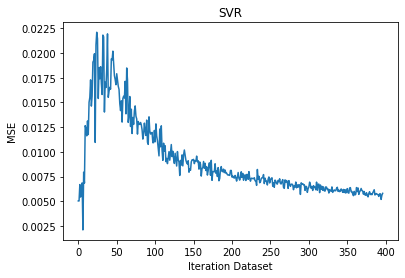

In [46]:
plt.plot(ms_train[0:])#, label=fi.name())
plt.ylabel('MSE')
plt.xlabel('Iteration Dataset')
plt.title('SVR')
plt.savefig('./SVR.png')
plt.show()
plt.show()

In [11]:
y_pred_test_ann = svc.predict(X_test)
y_train_pred_ann = svc.predict(X_train)
rmse = sqrt(mean_squared_error(y_train,y_train_pred_ann))
print("Train : {:0.3f}".format(rmse))

rmse = sqrt(mean_squared_error(y_test,y_pred_test_ann))
print("Test : {:0.3f}".format(rmse))

model.save('Uber_ANN')

print(y_pred_test_ann, y_train_pred_ann)

Train : 0.123
Test : 0.275
[0.82132003 0.47476378 0.51423786] [0.88967664 0.57916065 0.91331065 0.84190356 0.55347152 0.54029282
 0.62059958]


KLMs - 1

In [12]:
from kaftools.filters import KlmsFilter
from kaftools.kernels import GaussianKernel

klms = KlmsFilter(X_train, y_train)
klms.fit(learning_rate=0.1, kernel=GaussianKernel(sigma=0.1))

KeyError: 0

In [ ]:
def extendList(val, list=[]):
    list.append(val)
    return list

list1 = extendList(10)
list2 = extendList(123,[])
list3 = extendList('a')

print("list1 = %s" % list1)
print ("list2 = %s" % list2)
print ("list3 = %s" % list3)


In [ ]:
"""Kernel Least Mean Square Algorithm"""

# Author: Eder Santana <edersantanajunior@hotmail.com>
# License: BSD Style.

import numpy as np
from past.builtins import xrange
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import pairwise_kernels, euclidean_distances


class KernelLMS(BaseEstimator, TransformerMixin):
    """Kernel Least Mean Square Algorithm (KLMS)
    Non-linear filtering in feature space by linear filtering in Hilbert spaces
    Parameters
    ----------
    learning_rate: float
        Step size for gradient descent adaptation. This parameter is very important since regularizes the kernel method and, for a given data set, define convergence time and misadjustment
    growing_criterion: "dense" | "novelty" | "quantized" | "surprise"
        Default: "dense:"
    growing_param: float, float, optional
    kernel: "linear" | "poly" | "rbf" | "sigmoid" | "cosine" | "precomputed"
        Kernel.
        Default: "linear"
        
    learning_mode: "regression" | "classify"
        Determines the transformation over the output. If "regression" mode is selected, no transformation is performed. If in "classification" mode, KLMS is trained with a sigmoid transformation over its linear output.
        Default: "regression"
    
    loss_function: "least_squares" | "minimum_correntropy"
        Determines the loss function to be optimized. To use a custom loss function. Chooese "least_squares" and pass the "err" parameter to the "fit" method calculated as the loss function derivative for each sample.
    
    degree : int, default=3
        Degree for poly, rbf and sigmoid kernels. Ignored by other kernels.
    gamma : float, optional
        Kernel coefficient for rbf and poly kernels. Default: 1/n_features.
        Ignored by other kernels.
    coef0 : float, optional
        Independent term in poly and sigmoid kernels.
        Ignored by other kernels.
    kernel_params : mapping of string to any, optional
        Parameters (keyword arguments) and values for kernel passed as
        callable object. Ignored by other kernels.
    alpha: int
        Hyperparameter of the ridge regression that learns the
        inverse transform (when fit_inverse_transform=True).
        Default: 1.0
    Attributes
    ----------
    
    """

    def __init__(self, kernel="rbf", learning_mode="regression", \
            learning_rate=0.01, growing_criterion="dense", growing_param=None, \
            loss_function="least_squares", loss_param=None, gamma=None, degree=3, \
            coef0=1, kernel_params=None, correntropy_sigma=None, dropout=0):
        self.kernel = kernel
        self.l_mode = learning_mode
        self.kernel_params = kernel_params
        self.learning_rate = learning_rate
        self.loss_function = loss_function
        self.loss_param = loss_param
        self.growing_criterion = growing_criterion
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.centers_ = np.array([])
        self.coeff_ = np.array([])
        self.centerIndex_ = []
        self.X_online_ = np.array([])
        self.X_transformed_ = np.array([])
        self.growing_param = growing_param
        self.correntropy_sigma = correntropy_sigma
        self.XX = 0
        self.dropout = dropout
        self.backprop_ = np.array([])
        self.drop_scale_ = 1.

 
    """
    TODO: add support for precomputed gram matrix to make fit_transform faster  
    @property
    def _pairwise(self):
        return self.kernel == "precomputed"
    """
    def _get_kernel(self, X, Y=None):
        if callable(self.kernel):
            params = self.kernel_params or {}
        else:
            params = {"gamma": self.gamma,
                      "degree": self.degree,
                      "coef0": self.coef0}
        return pairwise_kernels(X, Y, metric=self.kernel,
                                filter_params=True, **params)

    def fit(self, X, d, err=None):
        """Fit the model from data in X.
            
            Parameters
            ----------
            X: array-like, shape (n_samples, n_features)
            Training vector, where n_samples in the number of samples and n_features is the number of features.
            d: array-like, shape (n_samples)
            Desired or teaching vector
            
            Returns
            -------
            self : object
            Returns the instance itself.
            """
        
        Nend = X.shape[0]
        N1 = 0
        # If initializing network
        if self.centers_.shape[0]==0:
            self.centers_ = X[0][np.newaxis]
            if self.growing_criterion != "dense":
                self.XX = (self.centers_*self.centers_).sum()
            self.centerIndex_ = [0]
            new_coeff = self.learning_rate * self._loss_derivative(d[0])
            self.coeff_ = np.append( self.coeff_, new_coeff );
            self.X_online_ = np.zeros(Nend)
            N1 = 1
    
        # For initialized networks
        ##############################################
        
        for k in xrange(N1,Nend):
            #if (k%100)==0:
			#	print k # print number of iterations
            dropin_centers, dropin_coeff = self._dropout()
            gram              = self._get_kernel(dropin_centers,X[k])
            self.X_online_[k] = np.dot(dropin_coeff, gram)
			#self._trainNet(X[k], d[k]-self.X_online_[k],k, self.XX)

            #gram = self._get_kernel(self.centers_, X[k])
            #self.X_online_[k] = np.dot(self.coeff_, gram)
            if err is None:            
                self._trainNet(X[k], d[k] - self.X_online_[k],k,self.XX)
            else:
                self._trainNet(X[k], err[k], k, self.XX)
        
        return self

    def transform(self, Z):
        """Project data Z into the fitted filter
        Parameters
        ----------
        Z: array-like, shape (n_samples, n_features)
        Returns
        -------
        Z_out: array-like, shape (n_samples)
        
        """
       
        Z_out = np.dot(self.coeff_, self._get_kernel(self.centers_,Z))
        if self.l_mode == "classify":
            Z_out = _sigmoid(Z_out, 0)
        
        return Z_out

    def fit_transform(self, X, d, err=None):
        """Fit the model from data in X and transform X.
        Parameters
        ----------
        X: array-like, shape (n_samples, n_features)
            Training vector, where n_samples in the number of samples
            and n_features is the number of features.
        Returns
        -------
        X_transformed_: array-like, shape (n_samples)
       
        """
        self.fit(X, d, err)

        self.X_transformed_ = np.hstack([self.X_transformed_, self.transform(X)])

        return self.X_transformed_
 
    def _trainNet(self, newX, err, k, XX):
        """ 
        Append centers to the networking following growing_criterion and adaptates the net coefficients
        
        Obs we mainly use err != None for training outside 'fit' method. This is useful for programas
        where klms is just a node.
            
        Returns
        -------
            `self` with possibly larger centers_, coeff_ and centerIndex_
            
        """
        if self.coeff_.shape[0] == 0:
            self.centers_ = newX
            
            if self.l_mode == "regression":
                self.coeff_ = np.append(self.coeff_, self.learning_rate *
                                   self._loss_derivative(err))
            elif self.l_mode == "classify":
                #self.coeff_ = np.append(self.coeff_, \
                #              _sigmoid(y,1) * self.learning_rate * \
                #              self._loss_derivative(d,_sigmoid(y,0)))
                self.coeff_ = np.append(self.coeff_, \
                              self.learning_rate * \
                              self._loss_derivative(err))
            else:
                assert self.l_mode=="regression" or self.l_mode=="classify"
        
            self.centerIndex_ = [k]
    
        else:
            #===========================
            #     DENSE GROW
            #===========================
            if self.growing_criterion == "dense":
                self.centers_ = np.vstack([self.centers_, newX])
                    #self.coeff_ = np.append(self.coeff_, self.learning_rate *
                    #                   self._loss_derivative(d, y))

                if self.l_mode == "regression":
                    #self.coeff_ = self.coeff_/self.coeff_.shape[0]
                    self.coeff_ = np.append(self.coeff_\
				    #/self.drop_scale_\
				    , self.learning_rate *
                                        self._loss_derivative(err))
                elif self.l_mode == "classify":
                    #self.coeff_ = np.append(self.coeff_, \
                    #                    _sigmoid(y,1) * self.learning_rate * \
                    #                    self._loss_derivative(d,_sigmoid(y,0)))
                    self.coeff_ = np.append(self.coeff_, \
                              self.learning_rate * \
                              self._loss_derivative(err))
                else:
                    assert self.l_mode=="regression" or self.l_mode=="classify"
               
                self.centerIndex_.append(k)

            #===========================
            #     NOVELTY GROW
            #===========================
            elif self.growing_criterion == "novelty":
                """ 
                The calculation of the euclidean distances were taking to much time.
                Using the expanded formula and storing the XX=X**2 terms will speeds
                things up.
                    
                """
                distanc = euclidean_distances(newX, self.centers_, \
                        Y_norm_squared=self.XX,squared=True)
 
                if np.max(distanc)>self.growing_param[0] and \
                        np.abs(err)>self.growing_param[1]:
                    self.centers_ = np.vstack([self.centers_, newX])
                    self.coeff_ = np.append(self.coeff_, self.learning_rate * \
                                           self._loss_derivative(err))
                    self.centerIndex_.append(k)
                    self.XX = (self.centers_**2).sum(axis=1)

            #===========================
            #     QUANTIZED GROW
            #===========================
            elif self.growing_criterion == "quantized":
                distanc = euclidean_distances(newX, self.centers_, \
                        Y_norm_squared=self.XX, squared=True)
                if np.min(distanc) <= self.growing_param[0]:
                    _min_idx = np.where(distanc==np.min(distanc))
                    self.coeff_[_min_idx] += self.learning_rate * \
                                             self._loss_derivative(err)
                else:
                    self.centers_ = np.vstack([self.centers_, newX])
                    self.coeff_ = np.append(self.coeff_, self.learning_rate * \
                                           self._loss_derivative(err))
                    self.centerIndex_.append(k)
                    self.XX = (self.centers_**2).sum(axis=1)
             
            #===========================
            #  STOCHASTIC QUANTIZATION
            #===========================
            elif self.growing_criterion == "s_quantized":
                distanc = euclidean_distances(newX, self.centers_, \
                        Y_norm_squared=self.XX, squared=True)
                if np.min(distanc) <= self.growing_param[0]:
                    # Sample the quanta from a multinomial distribution
                    mult_prob = distanc/np.mean(distanc)  
                    mult_sample = np.random.multinomial(1, mult_prob, size=1)     
                    self.coeff_[_min_idx] += self.learning_rate * \
                                             self._loss_derivative(err)
                else:
                    self.centers_ = np.vstack([self.centers_, newX])
                    self.coeff_ = np.append(self.coeff_, self.learning_rate * \
                                           self._loss_derivative(err))
                    self.centerIndex_.append(k)
                    self.XX = (self.centers_**2).sum(axis=1)
             

        return self

    def _loss_derivative(self,err):
        """ Evaluate the derivative of loss_function on d, y """
        if self.loss_function == "least_squares":
            ldiff = err
        elif self.loss_function == "minimum_correntropy":
            ldiff = (err)*np.exp(-(err)**2/(2*self.correntropy_sigma**2))
        else:
            assert self.loss_function=="least_squares" or self.loss_function=="minimum_correntropy"
    
        return ldiff
        
    def _reset_net(self):
        """
        Resets the network to initial state
        
        """
        self.centers_ = np.array([])
        self.coeff_ = np.array([])
        self.centerIndex_ = []
        self.X_online_ = np.array([])
        self.X_transformed_ = np.array([])
        self.XX = np.array([])
        
        return self
    def _dropout(self):
        net_size = self.coeff_.shape[0]
        shuf_idx = np.random.permutation(net_size)
        if self.dropout==0:
            dropin = range(net_size)
        elif self.dropout>0 and self.dropout<1: # if dropout is probability
            _bigger = max(1 , np.floor(net_size*self.dropout) ) 
            dropin  = shuf_idx[:_bigger]
        
        elif isinstance(self.dropout, int): # if dropout is number of units to keep
            _smaller = min(net_size, self.dropout)
            dropin = shuf_idx[:_smaller]
        else:
            raise Exception('dropout should be int or prabability')
        
        dropin_centers   = [self.centers_[_c] for _c in dropin]
        dropin_coeff     = [self.coeff_[_c] for _c in dropin]
        self.drop_scale_ = net_size / len(dropin_coeff)
             
        #dropin_centers = range(len(dropin))
        #dropin_coeff   = np.zeros(len(dropin))
        #for i in xrange(len(dropin)):
            #dropin_centers[i] = self.centers_[dropin[i],:]
            #dropin_coeff[i]   = self.coeff_[dropin[i]]
        return dropin_centers, dropin_coeff
		
		

def _sigmoid(y,derivative_order):
    exp_y = np.exp(-y)
    if derivative_order==0:
        sy =  1. / (1. + exp_y)
    elif derivative_order==1:
        sy = exp_y*(1-exp_y) # exp_y / ( (1. + 2*exp_y + exp_y*exp_y  ) )
    else:
        raise ("Dereivative order not defined")
    
    return sy

In [ ]:
#############

import numpy as np


class Kernel:
    def kernel(self, a, b):
        norm = np.linalg.norm(a - b)
        term = (norm * norm) / (2 * self.sigma * self.sigma)
        return np.exp(-1 * term)


class CKLMS(Kernel):
    def __init__(
        self,
        first_input,
        first_output,
        learning_step=0.5,
        sigma=0.5,
        sigma_cor=0.5
    ): 
        self.inputs = [first_input]
        self.errors = [first_output]
        self.learning_step = learning_step
        self.sigma = sigma
        self.sigma_cor = sigma_cor

    def predict(self, new_input):
        estimate = 0
        for i in range(0, len(self.inputs)):
            term = np.exp(
                -(self.errors[i] * self.errors[i]) /
                (2 * self.sigma_cor * self.sigma_cor))
            ker_eval = self.kernel(self.inputs[i], new_input)
            estimate += (
                self.learning_step * term * self.errors[i] * ker_eval)
        return estimate

    def update(self, new_input, new_output):
        self.errors.append(new_output - self.predict(new_input))
        self.inputs.append(new_input)

    def name(self):
        return 'CKLMS'


class KAPA1(Kernel):
    def __init__(self, u_0, d_0, K, eta, sigma):
        self.a = [eta * d_0]
        self.u = [u_0]
        self.d = [d_0]
        self.eta = eta
        self.K = K
        self.sigma = sigma

    def predict(self, x):
        ans = 0
        for i in range(len(self.a)):
            ans += self.a[i] * self.kernel(self.u[i], x)
        return ans

    def update(self, x, d):
        tmp = len(self.a)
        for i in range(max(0, tmp - self.K), tmp):
            y = self.predict(self.u[i])
            e = self.d[i] - y
            self.a[i] += self.eta * e

        error = d - self.predict(x)
        self.u.append(x)
        self.a.append(self.eta * error)
        self.d.append(d)

    def name(self):
        return 'KAPA1'


class KAPA2(Kernel):
    def __init__(
        self,
        first_input,
        first_output,
        learning_step=0.5,
        sigma=1,
        sample_size=5
    ):
        self.weights = [learning_step * first_output]
        self.inputs = [first_input]
        self.outputs = [first_output]
        self.learning_step = learning_step
        self.sigma = sigma
        self.sample_size = sample_size

    def predict(self, new_input):
        estimate = 0
        for i in range(0, len(self.weights)):
            estimate += self.weights[i] * self.kernel(self.inputs[i], new_input)
        return estimate

    def calc_G(self):
        tmp = len(self.weights)
        tmp2 = min(tmp, self.sample_size)
        G = np.zeros((tmp2, tmp2))
        for i in range(max(0, tmp - self.sample_size), tmp):
            for j in range(max(0, tmp - self.sample_size), tmp):
                i_g = i - max(0, tmp - self.sample_size)
                j_g = j - max(0, tmp - self.sample_size)
                G[j_g][i_g] = self.kernel(self.inputs[i], self.inputs[j])
        return G

    def update(self, new_input, new_output):
        tmp = len(self.weights)
        errors = []
        for k in range(max(0, tmp - self.sample_size), tmp):
            errors.append(self.outputs[k] - self.predict(self.inputs[k]))
        err_vec = np.array(errors)

        tmp2 = min(tmp, self.sample_size)
        G = self.calc_G()
        G_inv = np.linalg.inv(G + 1e-5 * np.identity(tmp2))
        weight_deltas = G_inv.dot(err_vec) * self.learning_step
        for i in range(max(0, tmp - self.sample_size), tmp):
            self.weights[i] += (
                weight_deltas[i - max(0, tmp - self.sample_size)])

        estimate = self.predict(new_input)
        error = new_output - estimate
        self.inputs.append(new_input)
        self.outputs.append(new_output)
        self.weights.append(self.learning_step * error)

    def name(self):
        return 'KAPA2'


class KAPA3(KAPA1):
    def __init__(
        self,
        first_input,
        first_output,
        learning_step=0.5,
        sigma=1,
        sample_size=5,
        reg_param=0.1
    ):
        super().__init__(
            first_input, first_output, sample_size, learning_step, sigma)
        self.reg_param = reg_param

    def update(self, new_input, new_output):
        tmp = len(self.a)
        for i in range(0, tmp):
            y = self.predict(self.u[i])
            e = self.d[i] - y
            if i >= max(0, tmp - self.K):
                self.a[i] *= (1 - self.eta * self.reg_param)
                self.a[i] += self.eta * e
            else:
                self.a[i] *= (1 - self.eta * self.reg_param)

        error = new_output - self.predict(new_input)
        self.u.append(new_input)
        self.a.append(self.eta * error)
        self.d.append(new_output)

    def name(self):
        return 'KAPA3'


class KAPA4(KAPA2):

    def __init__(
        self,
        first_input,
        first_output,
        learning_step=0.5,
        sigma=1,
        sample_size=5,
        reg_param=0.1
    ):
        super().__init__(
            first_input, first_output, learning_step, sigma, sample_size)
        self.reg_param = reg_param

    def update(self, new_input, new_output):
        G = self.calc_G()
        G_inv = np.linalg.inv(G + self.reg_param * np.identity(G.shape[0]))

        tmp = len(self.weights)
        d_np = np.array(self.outputs[max(0, tmp - self.sample_size):tmp])
        d_est = G_inv.dot(d_np)

        for i in range(0, tmp):
            i_est = self.predict(self.inputs[i])
            i_err = self.outputs[i] - i_est
            if i >= max(0, tmp - self.sample_size):
                self.weights[i] *= (1 - self.learning_step)
                self.weights[i] += (
                    self.learning_step *
                    d_est[i - max(0, tmp - self.sample_size)])
            else:
                self.weights[i] *= (1 - self.learning_step)

        error = new_output - self.predict(new_input)
        self.outputs.append(new_output)
        self.inputs.append(new_input)
        self.weights.append(self.learning_step * error)

    def name(self):
        return 'KAPA4'


class KRLS(Kernel):
    def __init__(
        self,
        first_input,
        first_output,
        reg_param=0.1,
        sigma=1
    ):
        self.reg_param = reg_param
        self.sigma = sigma
        self.Q = np.array(
            [1 / (reg_param + self.kernel(first_input, first_input))])
        self.weights = np.array([self.Q * first_output])
        self.inputs = [first_input]

    def predict(self, new_input):
        h = np.array([
            self.kernel(new_input, old_input) for old_input in self.inputs
        ]).reshape(1, len(self.inputs))
        return h.dot(self.weights)

    def update(self, new_input, expected):
        h = np.array([
            self.kernel(new_input, old_input) for old_input in self.inputs
        ]).reshape(len(self.inputs), 1)
        ht = h.T
        z = self.Q.dot(h)
        zt = z.T
        r = self.reg_param + self.kernel(new_input, new_input) - zt.dot(h)
        Q_size = len(z) + 1
        new_Q = np.zeros((Q_size, Q_size))
        new_Q[0:Q_size - 1, 0:Q_size - 1] = self.Q * r + z.dot(zt)
        new_Q[0:Q_size - 1, Q_size - 1:Q_size] = -z
        new_Q[Q_size - 1:Q_size, 0:Q_size - 1] = -zt
        new_Q[Q_size - 1][Q_size - 1] = 1
        self.Q = new_Q
        error = expected - ht.dot(self.weights)
        new_weights = np.zeros((Q_size, 1))
        new_weights[0:Q_size - 1, 0:1] = self.weights - z * (1 / r) * error
        new_weights[Q_size - 1][0] = (1 / r) * error
        self.weights = new_weights
        self.inputs.append(new_input)

        # reduce the regularization as we get more data
        self.reg_param *= 0.9

    def name(self):
        return 'KRLS'


class LMS:
    def __init__(self, num_params, learning_step):
        self.weights = np.ones(num_params)
        self.learning_step = learning_step

    def predict(self, new_input):
        return self.weights.dot(new_input)

    def update(self, new_input, desired_output):
        prediction_error = desired_output - self.predict(new_input)
        self.weights += self.learning_step * prediction_error * new_input

    def name(self):
        return 'LMS'


class QKLMS(KLMS):
    def __init__(
        self,
        num_params,
        first_input=None,
        first_output=None,
        learning_step=0.5,
        min_distance=1,
        sigma=0.5
    ):
        super().__init__(
            num_params, first_input, first_output, learning_step, sigma)
        self.min_distance = min_distance

    def update(self, new_input, expected):
        self.error = expected - self.predict(new_input)
        current_dist = 1e10
        current_index = None
        for i in range(0, len(self.inputs)):
            distance = np.linalg.norm(new_input - self.inputs[i])
            if distance < self.min_distance and distance < current_dist:
                current_dist = distance
                current_index = i
        if current_index is not None:
            self.weights[current_index] += self.learning_step * self.error
        else:
            new_weights = self.learning_step * self.error
            self.inputs.append(new_input)
            self.weights.append(new_weights)

    def name(self):
        return 'QKLMS'


class RMS:
    def __init__(self, num_params):
        self.num_params = num_params
        self.weights = np.ones(num_params)
        self.previous_inputs = []

    def predict(self, new_input):
        return self.weights.dot(new_input)

    def calc_time_avg_corr(self, new_input):
        R = np.eye(self.num_params)
        for input_data in self.previous_inputs:
            row = input_data.reshape(self.num_params, 1)
            col = input_data.reshape(1, len(input_data))
            R += row.dot(col)
        new_row = new_input.reshape(self.num_params, 1)
        new_col = new_input.reshape(1, self.num_params)
        R += new_row.dot(new_col)
        return R

    def calc_gain_vector(self, new_input):
        R = self.calc_time_avg_corr(new_input)
        return np.linalg.inv(R).dot(new_input)

    def update_weights(self, new_input, desired_output):
        prediction_error = desired_output - self.predict(new_input)
        k = self.calc_gain_vector(new_input)
        self.weights += k.dot(prediction_error)
'''

class APA1:
    def __init__(self, u, d, K, eta):
        self.U = np.array([u]).T
        self.D = np.array([d])
        self.w = np.zeros(len(u))  # initial guess
        self.K = K
        self.L = len(u)
        self.eta = eta

    def predict(self, new_input):
        return self.w.T.dot(new_input)

    def update(self, new_input, desired_output):
        tmp = min(len(self.U), self.K)
        U = np.zeros((self.L, tmp + 1))
        D = np.zeros(tmp + 1)

        U[:, :-1] = self.U[:, -tmp:]
        U[:, -1] = new_input.T
        D[: -1] = self.D[-tmp:]
        D[-1] = desired_output

        y = U.T.dot(self.w)
        e = D - y

        self.w += self.eta * U.dot(e)
        self.U = U
        self.D = D

    def name(self):
        return 'APA1'
    

class APA2:
    def __init__(self, u, d, K, eta, eps=1e-15):
        self.U = np.array([u]).T
        self.D = np.array([d])
        self.w = np.zeros(len(u))  # initial guess
        self.K = K
        self.L = len(u)

        self.eps = eps
        self.eta = eta

    def predict(self, new_input):
        return self.w.T.dot(new_input)

    def update(self, new_input, desired_output):
        tmp = min(len(self.U), self.K)
        U = np.zeros((self.L, tmp + 1))
        D = np.zeros(tmp + 1)

        U[:, :-1] = self.U[:, -tmp:]
        U[:, -1] = new_input.T
        D[: -1] = self.D[-tmp:]
        D[-1] = desired_output

        y = U.T.dot(self.w)
        e = D - y

        t = U.shape[1]
        norm_fact = np.linalg.pinv(self.eps * np.eye(t) + U.T.dot(U))

        self.w += self.eta * U.dot(norm_fact).dot(e)
        self.U = U
        self.D = D

    def name(self):
        return 'APA2'


class APA3:
    def __init__(self, u, d, K, eta, lambd):
        self.U = np.array([u]).T
        self.D = np.array([d])
        self.w = np.zeros(len(u))  # initial guess
        self.K = K
        self.L = len(u)
        self.eta = eta
        self.lambd = lambd

    def predict(self, new_input):
        return self.w.T.dot(new_input)

    def update(self, new_input, desired_output):
        tmp = min(len(self.U), self.K)
        U = np.zeros((self.L, tmp + 1))
        D = np.zeros(tmp + 1)

        U[:, :-1] = self.U[:, -tmp:]
        U[:, -1] = new_input.T
        D[: -1] = self.D[-tmp:]
        D[-1] = desired_output

        y = U.T.dot(self.w)
        e = D - y

        self.w = (1 - self.eta * self.lambd) * self.w + self.eta * U.dot(e)
        self.U = U
        self.D = D

    def name(self):
        return 'APA3'


class APA4:
    def __init__(self, u, d, K, eta, eps=1e-15):
        self.U = np.array([u]).T
        self.D = np.array([d])
        self.w = np.zeros(len(u))  # initial guess
        self.K = K
        self.L = len(u)

        self.eps = eps
        self.eta = eta

    def predict(self, new_input):
        return self.w.T.dot(new_input)

    def update(self, new_input, desired_output):
        tmp = min(len(self.U), self.K)
        U = np.zeros((self.L, tmp + 1))
        D = np.zeros(tmp + 1)

        U[:, :-1] = self.U[:, -tmp:]
        U[:, -1] = new_input.T
        D[: -1] = self.D[-tmp:]
        D[-1] = desired_output

        t = U.shape[1]
        norm_fact = np.linalg.pinv(self.eps * np.eye(t) + U.T.dot(U))

        self.w = (1 - self.eta) * self.w + self.eta * U.dot(norm_fact).dot(D)
        self.U = U
        self.D = D

    def name(self):
        return 'APA4'


def get_training_error(adap_filter, X, X_te, T, T_te, TD):
    N_tr = X.shape[0]
    N_te = X_te.shape[0]
    predictions=[]
    mse = []
    e=[]
    for i in range(N_tr):
        errors = []
        p=[]
        for j in range(N_te):
            p.append(adap_filter.predict(X_te[j]))
            errors.append(T_te[j] - adap_filter.predict(X_te[j]))
        predictions.append(p)
        e.append(errors)
        errors = np.array(errors)
        mse.append(np.mean(errors ** 2))

        adap_filter.update(X[i], T[i])
    return mse,predictions,e
    '''

class KLMS(Kernel):
    def __init__(
        self,
        num_params,
        first_input=None,
        first_output=None,
        learning_step=0.5,
        sigma=1
    ):
        if first_input is not None:
            self.inputs = [first_input]
        else:
            self.inputs = [np.zeros(num_params)]
        if first_output is not None:
            self.weights = [first_output * learning_step]
        else:
            self.weights = [0]
        self.learning_step = learning_step
        self.sigma = sigma
        self.error = None

    def predict(self, new_input):
        estimate = 0
        for i in range(0, len(self.weights)):
            addition = self.weights[i] * self.kernel(self.inputs[i], new_input)
            estimate += addition
        return estimate

    def update(self, new_input, expected):
        self.error = expected - self.predict(new_input)
        self.inputs.append(new_input)
        new_weights = self.learning_step * self.error  #UPDATED NEW WEIGHT
        self.weights.append(new_weights)

    def name(self):
        return 'KLMS'

In [ ]:
klmss = KLMS([1,2,3,4,5,6,7,8,9])
print(klmss.predict(8))

In [ ]:
import numpy as np
import scipy as sp
import pylab as pl
import time
#from kernel_lms import KernelLMS


t = np.arange(0,1500,.5)
f = .09
N = t.shape[0]-1
x1 = np.sin( 2*np.pi*f*t[0:-1] )
x2 = np.sin( 2*np.pi*f*t[1:] )
X = np.vstack( [x1, x2] ).T
d = np.sin( 4*np.pi*f*t[1:] )
n1 = .01*np.random.randn(int(np.floor(.9*N)))
n2 = .01*np.random.randn(int(np.ceil(.1*N)))+2
n = np.random.permutation(np.hstack([n1,n2]))
dhat = d + n;

klms  = []
klms = KernelLMS(learning_rate=.9, gamma=1, growing_criterion="novelty", 
                 growing_param=[1,.4], loss_function="minimum_correntropy",
                 correntropy_sigma=.4, dropout=.5)

t1 = time.time()
klms.fit_transform(X,dhat)
t2 = time.time()
print("Elapsed time = %f" % (t2-t1))

plot(klms.X_transformed_)
plot(d)